<a href="https://colab.research.google.com/github/tillu1208/OpenCV/blob/main/14_01_Face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Face Detection
This notebook will help you learn about Face Detection. You will learn some important techniques of face detection using OpenCV. Face Detection (or Facial Detection) is the practice of finding and extracting human faces from images or videos. It finds its applications in:
* Security
* Biometrics
* Photography
* Emotional Inference
* Entertainment
and many more.

Face detection can be regarded as a specific case of object-class detection. It is a trivial yet significant Computer Vision problem. It is the first step towards many facial based technologies, such as, *Face Recognition* or *Face Verification*. However, it does not mean that Face Detection acts only as a base for these technologies. It has a large number of applications of its own which we come across in our daily lives but don’t even realise. One of which is what we see in our phones while taking a picture of a person. The face detection algorithm built into our cameras detect where the faces are and adjusts the focus accordingly.

In [1]:
if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/tmpmbzdxjjkjtoq/AAA3p1uP0DyR_Vry6tQNg423a?dl=1 -O module-code.zip -q --show-progress
    !unzip -qq module-code.zip
    !pip install --upgrade opencv-contrib-python
else:
    pass

module-code.zip     100%[===================>] 116.41M  19.1MB/s    in 7.3s    
mapname:  conversion of  failed
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 MB 6.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.8.0.76
    Uninstalling opencv-contrib-python-4.8.0.76:
      Successfully uninstalled opencv-contrib-python-4.8.0.76


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

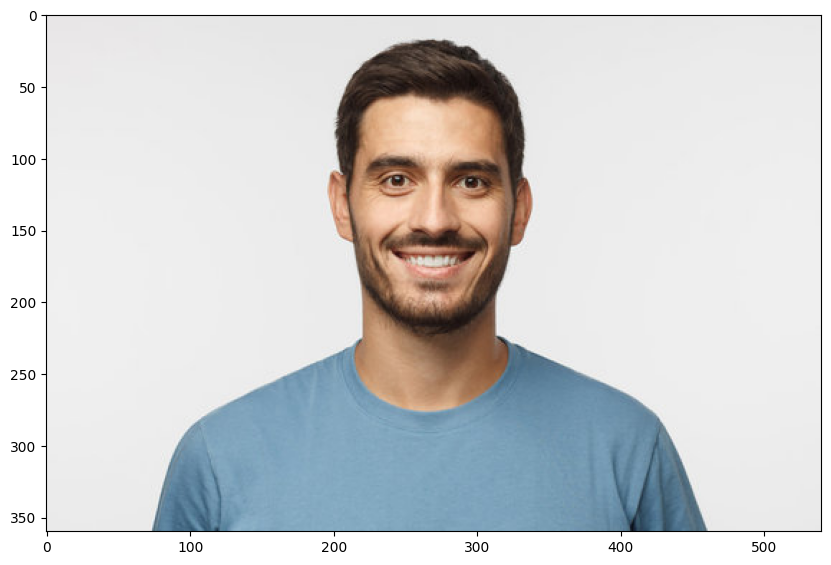

In [3]:
# Read the input image
img1 = cv2.imread('visuals/c0-m14-NB-img1.jpg', cv2.IMREAD_COLOR)
plt.figure(figsize=(10,10))
plt.imshow(img1[:,:,::-1]);

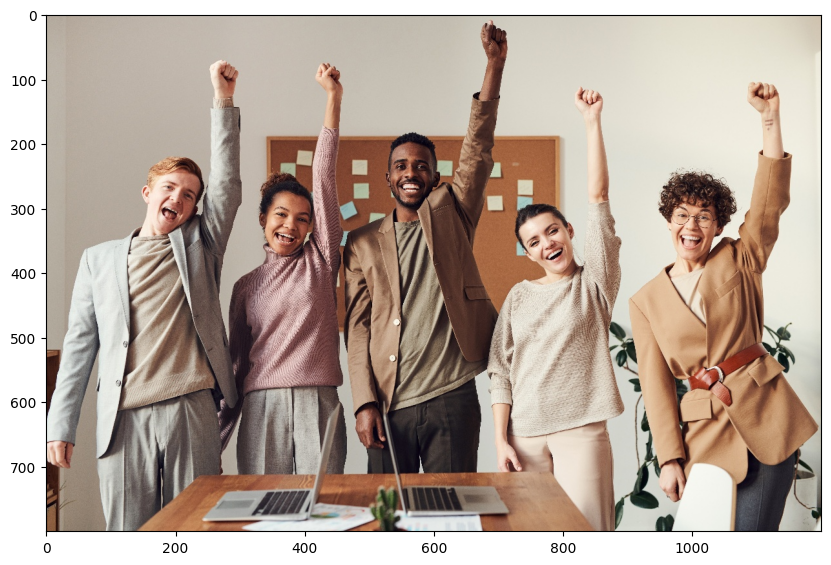

In [4]:
img2 = cv2.imread('visuals/c0-m14-NB-img2.jpg', cv2.IMREAD_COLOR)
plt.figure(figsize=(10,10))
plt.imshow(img2[:,:,::-1]);

# Face Detection using DNN

## Reading the DNN model

**`readNetFromCaffe()`** Reads a network model stored in [Caffe](http://caffe.berkeleyvision.org/) framework's format.

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
cv2.dnn.readNetFromCaffe( prototxt[, caffeModel] )
```
The function has **2 required arguments** and 1 optional:

1. `prototxt` path to the .prototxt file with text description of the network architecture.
2. `caffeModel`	path to the .caffemodel file with learned network.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`cv2.dnn.readNetFromCaffe()`**](https://docs.opencv.org/4.5.2/d6/d0f/group__dnn.html#ga29d0ea5e52b1d1a6c2681e3f7d68473a)

<br>
<br>

## Converting image to blob


**`blobFromImage()`** Creates 4-dimensional blob from image. Optionally resizes and crops image from center, subtract mean values, scales values by scalefactor and swap Blue and Red channels.

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
dst = cv2.dnn.blobFromImage( image[, scalefactor[, size[, mean[, swapRB[, crop[, ddepth]]]]]] )
```
`dst`: Is the output image of the same size and depth as `image`.

The function has **1 required arguments** and rest are optional:

1. `image` is the input image (with 1-, 3- or 4-channels).
2. `scalefactor` is the multiplier for image values.
3. `size`is  the spatial size for output image.
4. `mean` scalar with mean values which are subtracted from channels. Values are intended to be in (mean-R, mean-G, mean-B) order if image has BGR ordering and swapRB is true.
5. `swapRB` is the flag which indicates that swap first and last channels in 3-channel image is necessary.
6. `crop` flag which indicates whether image will be cropped after resize or not
7. `ddepth`	depth of output blob. Choose either CV_32F or CV_8U.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`cv2.dnn.blobFromImage()`**](https://docs.opencv.org/4.5.2/d6/d0f/group__dnn.html#ga98113a886b1d1fe0b38a8eef39ffaaa0)

<br>
<br>


## Setting input value

**`setInput()`** Sets the new input value for the network.

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
cv2.dnn_Net.setInput( blob[, name[, scalefactor[, mean]]] )
```
The function has **1 required arguments** and 3 optional:

1. `blob` is a new blob.
2. `name` is the name of input layer.
3. `scalefactor` is an optional normalization scale.
4. `mean` is an optional mean subtraction values.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`cv2.dnn_Net.setInput()`**](https://docs.opencv.org/4.5.2/db/d30/classcv_1_1dnn_1_1Net.html#a5e74adacffd6aa53d56046581de7fcbd)

<br>
<br>

## Detections using the DNN Model

**`forward()`** Runs forward pass to compute output of layer with name outputName. Returns blob for first output of specified layer.

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
cv2.dnn_Net.forward( [, outputName] )
```
The function has 1 optional arguments:

1. `outputName`	is the name of layer for which output is needed.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`cv2.dnn_Net.forward()`**](https://docs.opencv.org/4.5.2/db/d30/classcv_1_1dnn_1_1Net.html#a98ed94cb6ef7063d3697259566da310b)


In [11]:
# Function for rectangular blur with dnn
def detect(frame, net, scale, mean, in_width, in_height):
    h = frame.shape[0]
    w = frame.shape[1]
   # Convert the image into a blob format.
    blob = cv2.dnn.blobFromImage(frame, scalefactor=scale,
                                 size=(in_width, in_height), mean=mean, swapRB=False, crop=False)
    # Pass the blob to the DNN model.
    net.setInput(blob)
    # Retrieve detections from the DNN model.
    detections = net.forward()

    # Process each detection.
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > detection_threshold:

            # Extract the bounding box coordinates from the detection.
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (x1, y1, x2, y2) = box.astype('int')

            # Annotate the video frame with the detection results.
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            label = 'Confidence: %.4f' % confidence
            label_size, base_line = cv2.getTextSize(label, font_style, font_scale, font_thickness)
            cv2.rectangle(frame, (x1, y1 - label_size[1]), (x1 + label_size[0], y1 + base_line), (255, 255, 255), cv2.FILLED)
            cv2.putText(frame, label, (x1, y1), font_style, font_scale, (0, 0, 0))
    return frame

In [12]:
# Create a network object.
net = cv2.dnn.readNetFromCaffe('./model/deploy.prototxt',
                               './model/res10_300x300_ssd_iter_140000.caffemodel')

In [13]:
# Model parameters used to train model.
mean = [104, 117, 123]
scale = 1.0
in_width = 300
in_height = 300

In [14]:
# Set the detection threshold for face detections.
detection_threshold = 0.5

# Annotation settings.
font_style = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
font_thickness = 1

[[[[0.         1.         0.9976445  ... 0.14720124 0.6017482
    0.58863443]
   [0.         1.         0.12329775 ... 4.008151   4.84179
    4.9868994 ]
   [0.         1.         0.11782128 ... 4.0098505  0.8305844
    4.9894714 ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]]]


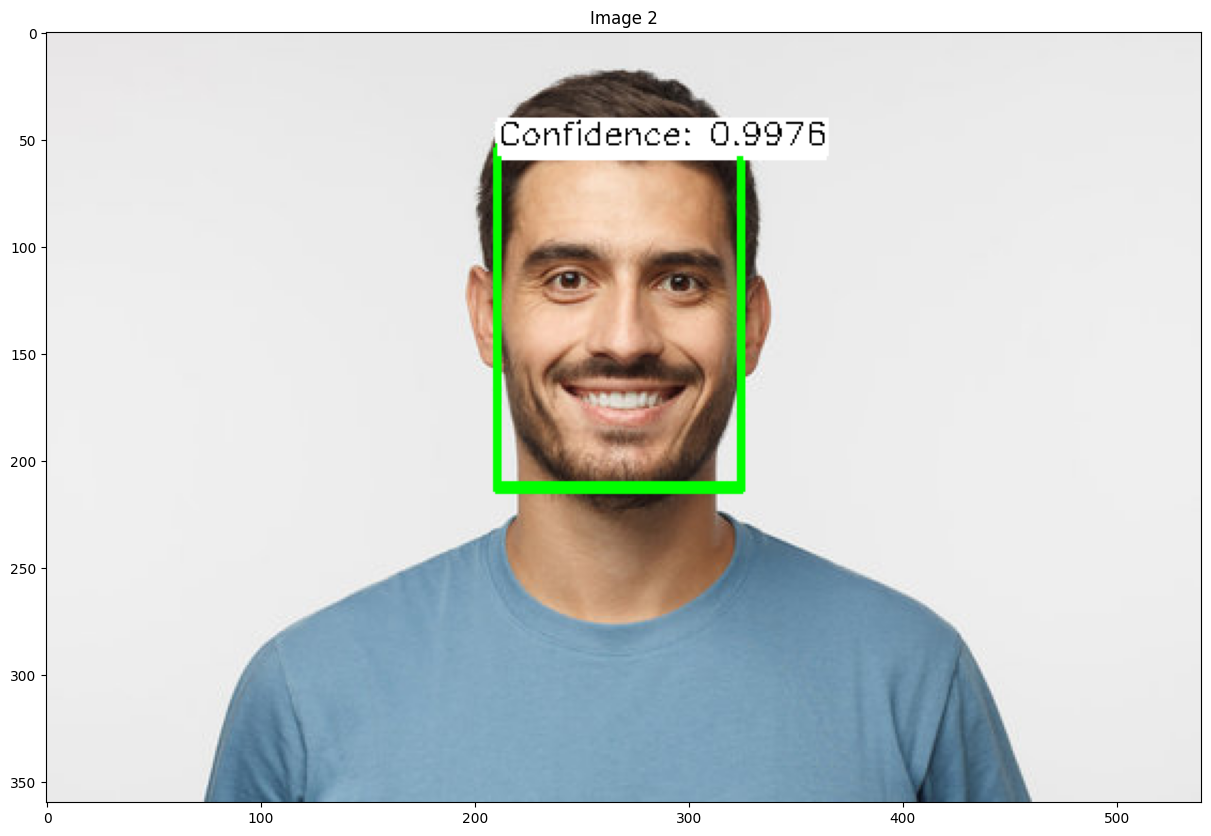

In [15]:
op1 = detect(img1, net, scale, mean, in_width, in_height)

plt.figure(figsize = [15,10])
plt.imshow(op1[:,:,::-1])
plt.title("Image 2");

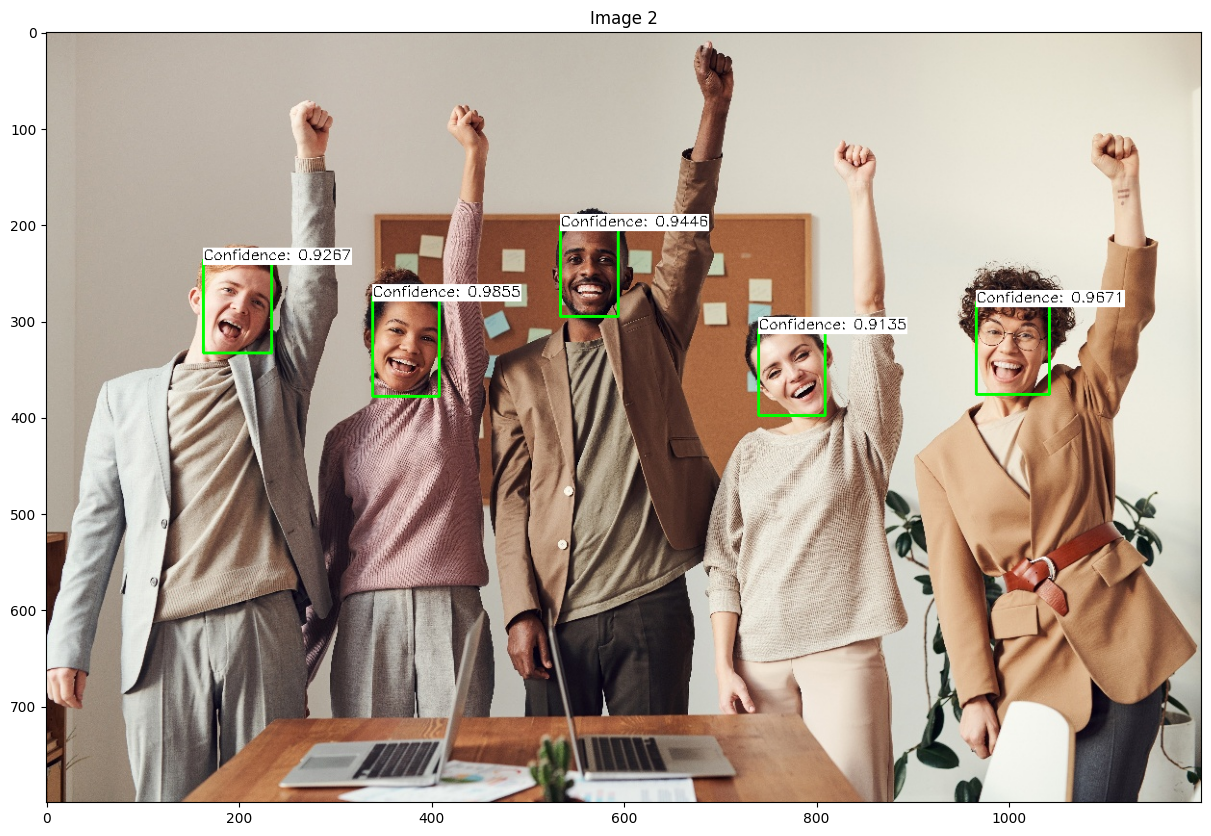

In [10]:
op2 = detect(img2, net, scale, mean, in_width, in_height)
plt.figure(figsize = [15,10])
plt.imshow(op2[:,:,::-1])
plt.title("Image 2");